In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = df.iloc[:,3:]

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


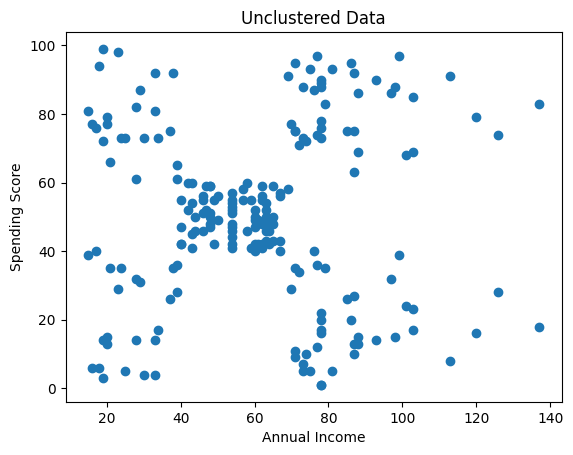

In [17]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [21]:
km = KMeans(n_clusters=3)

In [22]:
km.fit_predict(x)

/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [23]:
x.shape

(200, 2)

In [24]:
#sse
km.inertia_

106348.37306211119

In [28]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

In [29]:
sse

[269981.2800000001,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30241.343617936585,
 25004.36690990053,
 21850.165282585633,
 19753.308236183544,
 17856.51076210611,
 16097.614224664223,
 14293.143054331289,
 12738.312658437659,
 12279.527966641199]

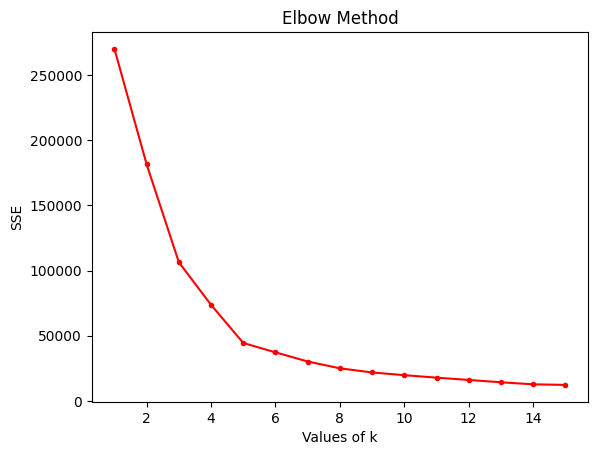

In [30]:
plt.title('Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
plt.plot(range(1,16), sse, marker= '.', color='red')

In [33]:
from sklearn.metrics  import  silhouette_score

In [35]:
silh = []
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

In [36]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5288104473798049,
 0.45697007065559897,
 0.4569479922714121,
 0.4553911835409334,
 0.437841976811071,
 0.4126546118705805,
 0.4342449537010975,
 0.4394403993060249,
 0.41371875666912394]

<BarContainer object of 14 artists>

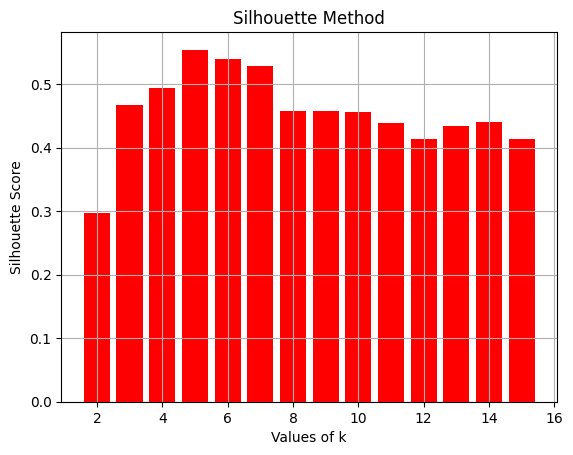

In [37]:
plt.title('Silhouette Method')
plt.xlabel('Values of k')
plt.ylabel('Silhouette Score')
plt.grid()
plt.bar(range(2,16), silh, color='red')

In [39]:
km = KMeans(n_clusters = 5)

In [40]:
labels =km.fit_predict(x)

/home/xpanther/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
labels

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

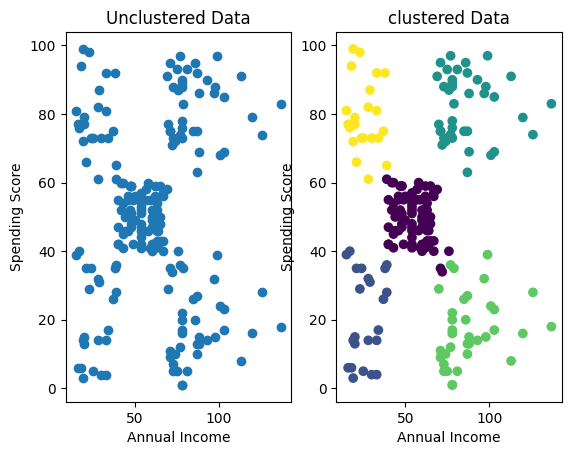

In [43]:
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels)



In [44]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [45]:
cent = km.cluster_centers_

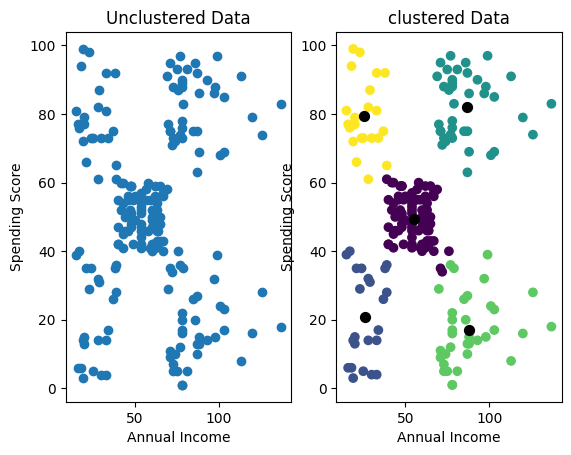

In [46]:
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels)

plt.scatter(cent[:,0], cent[:,1], s=50, color='k')

In [47]:
km.inertia_

44448.45544793371

In [49]:
km.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [51]:
df[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [53]:
km.predict([[56,61]])

/home/xpanther/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [55]:
agl = AgglomerativeClustering(n_clusters=5)

In [56]:
alabels =agl.fit_predict(x)

In [57]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

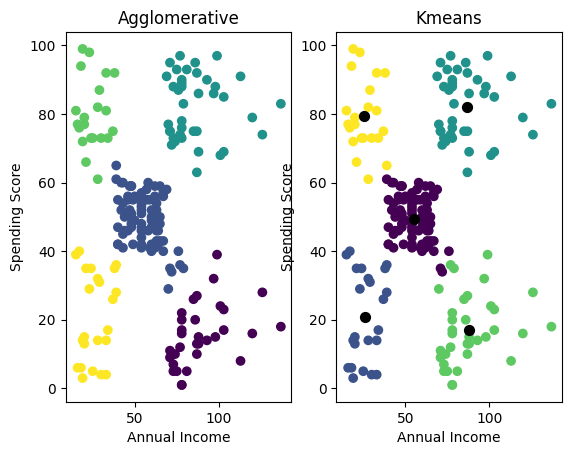

In [58]:
plt.subplot(1,2,1)
plt.title('Agglomerative')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=alabels)

plt.subplot(1,2,2)
plt.title('Kmeans')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels)

plt.scatter(cent[:,0], cent[:,1], s=50, color='k')